In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
LBS=pd.read_csv('HistoricalData_Lumber.csv', index_col='Date', parse_dates=True).dropna().sort_index()


In [220]:
LBS.index

DatetimeIndex(['2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-23', '2012-04-24', '2012-04-25', '2012-04-26',
               '2012-04-27', '2012-04-30',
               ...
               '2022-04-01', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07', '2022-04-08', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14'],
              dtype='datetime64[ns]', name='Date', length=2472, freq=None)

In [221]:
LBS.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2012-04-17,266.5,34.0,267.0,268.4,266.5
2012-04-18,266.5,719.0,267.0,273.8,265.1
2012-04-19,271.5,1.0,271.5,271.5,271.5
2012-04-20,275.7,839.0,272.8,276.7,272.4
2012-04-23,274.0,2.0,274.5,274.5,274.0


In [222]:
LBS.tail()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-04-08,949.9,242.0,891.0,949.9,890.0
2022-04-11,886.3,229.0,971.1,992.6,870.0
2022-04-12,874.2,244.0,862.0,890.0,829.3
2022-04-13,883.7,177.0,876.6,902.5,844.8
2022-04-14,889.0,160.0,880.3,904.8,862.1


In [223]:
LBS


,Close/Last,Volume,Open,High,Low
Date,,,,,
2012-04-17,266.5,34.0,267.0,268.4,266.5
2012-04-18,266.5,719.0,267.0,273.8,265.1
2012-04-19,271.5,1.0,271.5,271.5,271.5
2012-04-20,275.7,839.0,272.8,276.7,272.4
2012-04-23,274.0,2.0,274.5,274.5,274.0
...,...,...,...,...,...
2022-04-08,949.9,242.0,891.0,949.9,890.0
2022-04-11,886.3,229.0,971.1,992.6,870.0
2022-04-12,874.2,244.0,862.0,890.0,829.3


In [224]:
LBS.info

<bound method DataFrame.info of             Close/Last  Volume   Open   High    Low
Date                                               
2012-04-17       266.5    34.0  267.0  268.4  266.5
2012-04-18       266.5   719.0  267.0  273.8  265.1
2012-04-19       271.5     1.0  271.5  271.5  271.5
2012-04-20       275.7   839.0  272.8  276.7  272.4
2012-04-23       274.0     2.0  274.5  274.5  274.0
...                ...     ...    ...    ...    ...
2022-04-08       949.9   242.0  891.0  949.9  890.0
2022-04-11       886.3   229.0  971.1  992.6  870.0
2022-04-12       874.2   244.0  862.0  890.0  829.3
2022-04-13       883.7   177.0  876.6  902.5  844.8
2022-04-14       889.0   160.0  880.3  904.8  862.1

[2472 rows x 5 columns]>

In [225]:
#LBS.index.freq = 'MS'
pd.infer_freq
#pd.tseries.frequencies.to_offset
#dataset = dataset.asfreq("MS")
#dataset.index

<function pandas.tseries.frequencies.infer_freq(index, warn: 'bool' = True) -> 'str | None'>

In [226]:
LBS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2472 entries, 2012-04-17 to 2022-04-14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2472 non-null   float64
 1   Volume      2472 non-null   float64
 2   Open        2472 non-null   float64
 3   High        2472 non-null   float64
 4   Low         2472 non-null   float64
dtypes: float64(5)
memory usage: 115.9 KB


<AxesSubplot:xlabel='Date'>

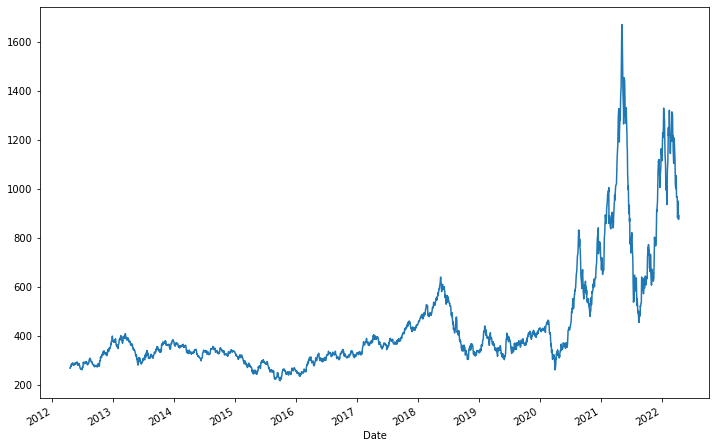

In [227]:
LBS['Close/Last'].plot(figsize=(12,8))

In [228]:
LBS


,Close/Last,Volume,Open,High,Low
Date,,,,,
2012-04-17,266.5,34.0,267.0,268.4,266.5
2012-04-18,266.5,719.0,267.0,273.8,265.1
2012-04-19,271.5,1.0,271.5,271.5,271.5
2012-04-20,275.7,839.0,272.8,276.7,272.4
2012-04-23,274.0,2.0,274.5,274.5,274.0
...,...,...,...,...,...
2022-04-08,949.9,242.0,891.0,949.9,890.0
2022-04-11,886.3,229.0,971.1,992.6,870.0
2022-04-12,874.2,244.0,862.0,890.0,829.3


In [229]:
train =LBS['Close/Last'].iloc[:500]


In [230]:
test = LBS['Close/Last'].iloc[500:]

<AxesSubplot:xlabel='Date'>

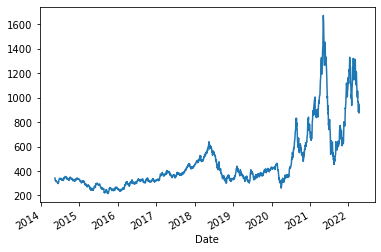

In [231]:
test.plot()

<AxesSubplot:xlabel='Date'>

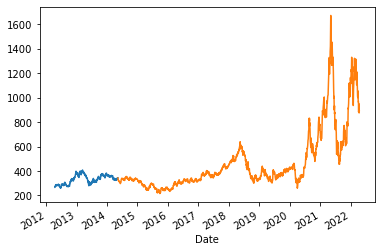

In [232]:
train.plot()
test.plot()

In [233]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [215]:
model = ExponentialSmoothing(train, trend='mul',seasonal='mul',seasonal_periods=4).fit()


C:\Users\Amazi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Amazi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Amazi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


C:\Users\Amazi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


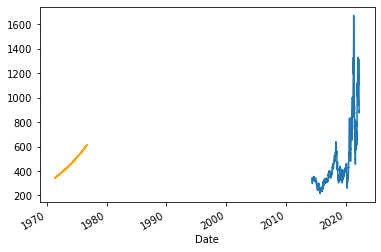

In [238]:
test.plot()
##plt.plot(test.Close/Last, color='blue')
plt.plot(model.forecast(test.shape[0]), color= 'Orange' )

# test.plot()
# model.forecast(14).plot()

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [36]:
LBS=pd.read_csv('HistoricalData_Lumber.csv', index_col= "Date", parse_dates=True).dropna().sort_index()
LBS.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2012-04-17,266.5,34.0,267.0,268.4,266.5
2012-04-18,266.5,719.0,267.0,273.8,265.1
2012-04-19,271.5,1.0,271.5,271.5,271.5
2012-04-20,275.7,839.0,272.8,276.7,272.4
2012-04-23,274.0,2.0,274.5,274.5,274.0


In [37]:
#index
LBS = LBS.asfreq("D")
LBS.index

DatetimeIndex(['2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26',
               ...
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14'],
              dtype='datetime64[ns]', name='Date', length=3650, freq='D')

In [38]:
model = ExponentialSmoothing(endog= LBS.Open).fit()

C:\Users\Amazi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Amazi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [39]:
predictions = model.forecast(steps= 31)

C:\Users\Amazi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


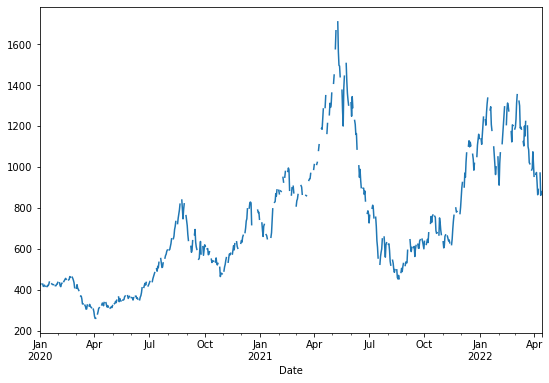

In [40]:
LBS['Open']['2020-01-01':].plot(figsize =(9,6))
predictions.plot